# BAX Emittance Minimization (LCLS-II) - Includes Bmag calculation
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240416_LCLS_II_Injector'

# Read pv info from YAML files

In [3]:
import sys
import yaml
sys.path.append("../../")
sys.path.append("../../../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("../../pv_bounds.yml"))
pv_objects = get_pv_objects("../../tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("../../reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:COL0:320:BCTRL': -0.10923,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -2.1773542,
 'QUAD:HTR:140:BCTRL': 1.7649175,
 'QUAD:HTR:300:BCTRL': 1.8073254,
 'QUAD:HTR:320:BCTRL': -2.340077,
 'SOLN:GUNB:212:BCTRL': 0.04418,
 'SOLN:GUNB:823:BCTRL': 0.0247}

In [30]:
reset_pvs()

QUAD:COL0:320:BCTRL -0.10923
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -2.1773542
QUAD:HTR:140:BCTRL 1.7649175
QUAD:HTR:300:BCTRL 1.8073254
QUAD:HTR:320:BCTRL -2.340077
SOLN:GUNB:212:BCTRL 0.04418
SOLN:GUNB:823:BCTRL 0.0247


In [9]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'otr_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240416_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [10]:
image_diagnostic.measure_background()

array([[0. , 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0.2, 0. , 0. , ..., 0. , 0.4, 7.2],
       ...,
       [0. , 0. , 0. , ..., 0.6, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0. , 0. , ..., 0. , 0. , 0. ]])

displaying image
fitting image
{'Cx': 315.9570897221426,
 'Cy': 308.44405689245383,
 'Sx': 11.708255088526908,
 'Sy': 15.839241526133097,
 'bb_penalty': -224.23010561985512,
 'log10_total_intensity': 5.673386261544044,
 'total_intensity': 471396.4}


{'Cx': 315.9570897221426,
 'Cy': 308.44405689245383,
 'Sx': 225.26682790325768,
 'Sy': 304.74700696280075,
 'bb_penalty': -224.23010561985512,
 'total_intensity': 471396.4,
 'log10_total_intensity': 5.673386261544044}

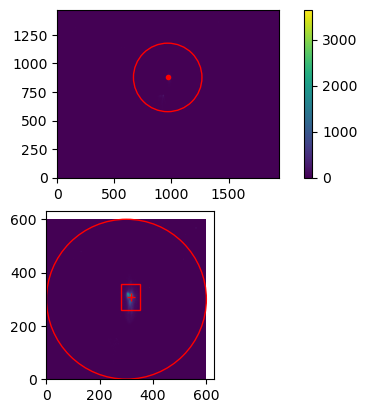

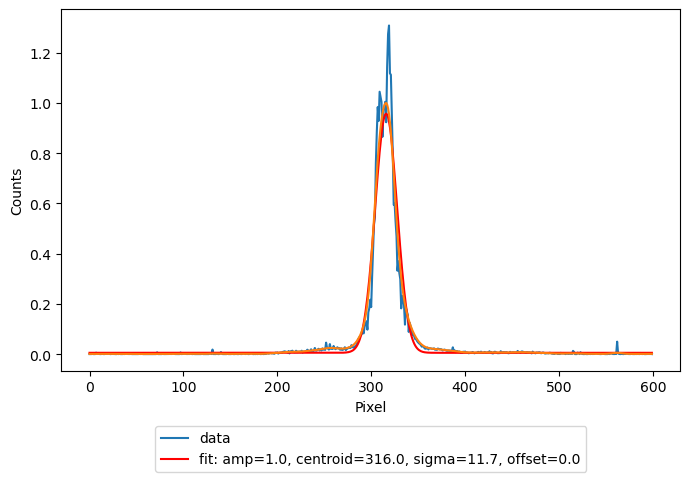

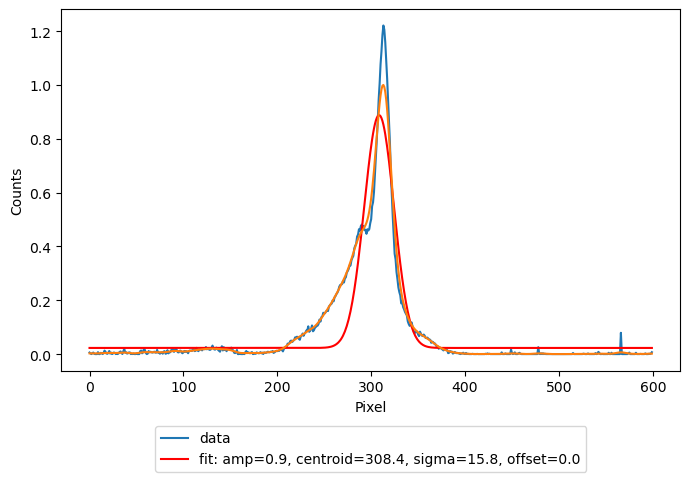

In [11]:
image_diagnostic.test_measurement()

# Imports

In [12]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [13]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [14]:
eval_beamsize({})

fitting image


{'Cx': 315.691105186439,
 'Cy': 307.87088995468105,
 'Sx': 216.38787914935068,
 'Sy': 316.8999513098969,
 'bb_penalty': -224.33711663720067,
 'total_intensity': 463261.80000000005,
 'log10_total_intensity': 5.665826490289088,
 'save_filename': '/home/physics/ml_tuning/20240416_LCLS_II_Injector/OTRS_HTR_330_1713327855.h5',
 'QUAD:HTR:140:BCTRL': 1.7649175,
 'QUAD:HTR:300:BCTRL': 1.8073254,
 'QUAD:HTR:320:BCTRL': -2.340077,
 'SOLN:GUNB:212:BCTRL': 0.04418,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'SOLN:GUNB:823:BCTRL': 0.0247,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'ACCL:GUNB:455:PDES': -120.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': -8.5,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -2.1773542,
 'QUAD:COL0:320:BCTRL': -0.10923,
 'time': 1713327855.995992,
 'Sx_mm': 0.21638787914935068,
 'Sy_mm': 0.3168999513098969,
 'xrms_sq': 0.04682371424275399,
 'yrms_sq': 0.10042557914021502}

## VOCS

In [15]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'SOLN:GUNB:823:BCTRL': [0.0225, 0.0285],
        'QUAD:HTR:120:BCTRL': [-3.0, -0.5],
        'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
        'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
        #'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
        #'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
        #'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:GUNB:823:1:BCTRL',
 'QUAD:GUNB:823:2:BCTRL',
 'QUAD:HTR:120:BCTRL',
 'SOLN:GUNB:823:BCTRL']

# Run Bayesian Exploration on a grid

In [16]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 2
tuning_dims = [0,1,3]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=5),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True
)

## sample in local area around reference point

In [17]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.25)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:COL0:320:BCTRL -0.10923
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -2.1773542
QUAD:HTR:140:BCTRL 1.7649175
QUAD:HTR:300:BCTRL 1.8073254
QUAD:HTR:320:BCTRL -2.340077
SOLN:GUNB:212:BCTRL 0.04418
SOLN:GUNB:823:BCTRL 0.0247
{'QUAD:GUNB:823:1:BCTRL': 0.0032658, 'QUAD:GUNB:823:2:BCTRL': 0.002111, 'QUAD:HTR:120:BCTRL': -2.1773542, 'SOLN:GUNB:823:BCTRL': 0.0247}
QUAD:GUNB:823:1:BCTRL 0.0008491733840053018
QUAD:GUNB:823:2:BCTRL 0.00025908233039705623
QUAD:HTR:120:BCTRL -2.798665107122997
SOLN:GUNB:823:BCTRL 0.024002101660825125
fitting image
QUAD:GUNB:823:1:BCTRL 0.0023891796006635948
QUAD:GUNB:823:2:BCTRL 0.0008954126414764203
QUAD:HTR:120:BCTRL -2.557569069384598
SOLN:GUNB:823:BCTRL 0.023618454171254417
fitting image
QUAD:GUNB:823:1:BCTRL 0.003828248254946813
QUAD:GUNB:823:2:BCTRL 0.0002683817557664513
QUAD:HTR:120:BCTRL -1.554240743564156
SOLN:GUNB:823:BCTRL 0.025335058457402145
fitting 

,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,QUAD:HTR:120:BCTRL,SOLN:GUNB:823:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.000849,0.000259,-2.798665,0.024002,303.168965,387.410282,595.938986,514.278033,-106.808566,364510.6,...,-8.5,0.0,-0.10923,1.713327e+09,0.595939,0.514278,0.355143,0.264482,3.739340,False
1,0.002389,0.000895,-2.557569,0.023618,306.931129,386.134710,371.413811,426.839307,-134.111867,419669.8,...,-8.5,0.0,-0.10923,1.713327e+09,0.371414,0.426839,0.137948,0.182192,3.017485,False
2,0.003828,0.000268,-1.554241,0.025335,NaN,NaN,NaN,NaN,56.630565,948702.0,...,-8.5,0.0,-0.10923,1.713327e+09,NaN,NaN,NaN,NaN,3.515838,False
3,0.003955,0.003326,-2.284889,0.025154,313.035781,321.833950,174.776860,300.244513,-220.401729,601654.8,...,-8.5,0.0,-0.10923,1.713327e+09,0.174777,0.300245,0.030547,0.090147,3.459368,False
4,0.001148,0.001918,-1.985230,0.025166,320.036820,289.749008,379.504249,228.284192,-208.478020,791185.8,...,-8.5,0.0,-0.10923,1.713327e+09,0.379504,0.228284,0.144023,0.052114,4.041673,False
5,0.004851,0.003735,-2.226423,0.025707,315.360534,301.056247,150.848316,426.003049,-222.119059,587643.8,...,-8.5,0.0,-0.10923,1.713327e+09,0.150848,0.426003,0.022755,0.181479,4.980344,False
6,0.002733,0.002261,-1.752615,0.025888,322.688125,287.044914,225.635320,437.708077,-200.284432,892098.2,...,-8.5,0.0,-0.10923,1.713327e+09,0.225635,0.437708,0.050911,0.191588,4.034045,False
7,0.001760,0.003153,-2.514145,0.025032,313.990548,324.520326,344.881628,940.803239,-115.861688,440092.4,...,-8.5,0.0,-0.10923,1.713327e+09,0.344882,0.940803,0.118943,0.885111,3.526836,False
8,0.002653,0.004168,-2.651816,0.025760,308.638279,320.785799,160.003858,884.173095,-137.833105,434068.2,...,-8.5,0.0,-0.10923,1.713327e+09,0.160004,0.884173,0.025601,0.781762,2.925226,False
9,0.000881,0.002712,-2.228665,0.024586,315.518275,309.213847,327.070478,569.933318,-181.491247,622294.4,...,-8.5,0.0,-0.10923,1.713327e+09,0.327070,0.569933,0.106975,0.324824,3.546830,False


In [18]:
import time
start = time.time()
for i in range(5):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:GUNB:823:1:BCTRL 0.0017025778528674113
QUAD:GUNB:823:2:BCTRL 0.0031675632877383305
QUAD:HTR:120:BCTRL -2.1329319677458365
SOLN:GUNB:823:BCTRL 0.024170552819236725
fitting image
QUAD:GUNB:823:1:BCTRL 0.0025244333426746477
QUAD:GUNB:823:2:BCTRL 0.0036231724188278375
QUAD:HTR:120:BCTRL -2.0371989758093774
SOLN:GUNB:823:BCTRL 0.023755414507735228
fitting image
QUAD:GUNB:823:1:BCTRL 0.003346288832481885
QUAD:GUNB:823:2:BCTRL 0.004078781549917344
QUAD:HTR:120:BCTRL -1.9414659838729182
SOLN:GUNB:823:BCTRL 0.023340276196233734
fitting image
QUAD:GUNB:823:1:BCTRL 0.004168144322289121
QUAD:GUNB:823:2:BCTRL 0.004534390681006851
QUAD:HTR:120:BCTRL -1.8457329919364591
SOLN:GUNB:823:BCTRL 0.022925137884732237
fitting image
QUAD:GUNB:823:1:BCTRL 0.004989999812096357
QUAD:GUNB:823:2:BCTRL 0.004989999812096357
QUAD:HTR:120:BCTRL -1.75
SOLN:GUNB:823:BCTRL 0.022509999573230743
fitting image
QUAD:GUNB:823:1:BCTRL 0.004490999830886721
QUAD:GUNB:823:2:BCTRL 0.004989999812096357
QUAD:HTR:120:BCTRL -1.50

In [19]:
X_bayes_exp.dump_file = "bayes_exp.yml"
X_bayes_exp.dump()

## Visualize model/data

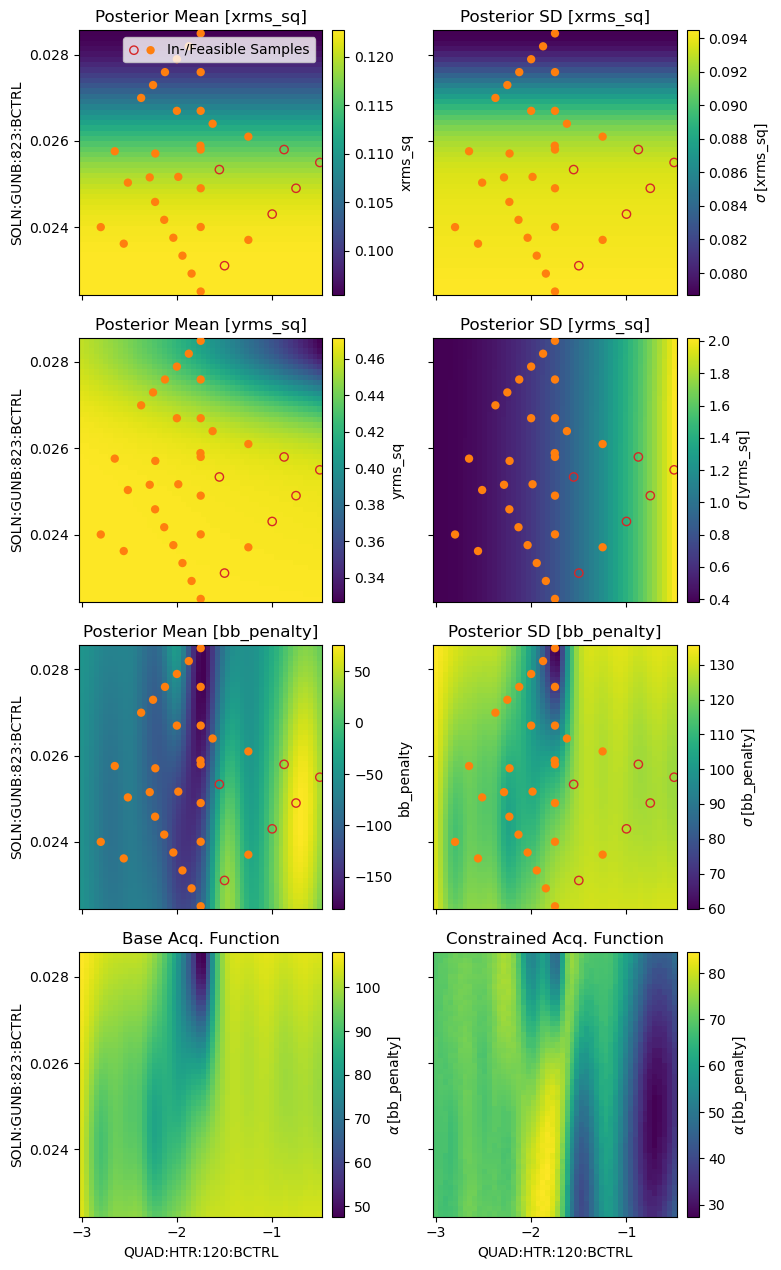

In [20]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:1:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:2:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)


# Run BAX

In [17]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
import torch
from test_algorithm import GridMinimizeEmitBmag

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {'xrms_sq': scaled_covar_module, "yrms_sq": deepcopy(scaled_covar_module)}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

QUAD_LENGTH = 0.124 # m
rmat_x = torch.tensor([[-1.5907,    3.0331],
   [-0.7527,   0.8065 ]])
rmat_y = torch.tensor([[4.7608,   8.2171],
[ -1.1502,    -1.7751]])
THICK_QUAD = False
BEAM_ENERGY = 0.088 # GeV
SCALE_FACTOR = 2.74 # multiplicative factor to convert from measurement quad PV units to geometric focusing strength

algo_kwargs = {
        'x_key': "xrms_sq",
        'y_key': "yrms_sq",
        'scale_factor': SCALE_FACTOR,
        'q_len': QUAD_LENGTH,
        'rmat_x': rmat_x,
        'rmat_y': rmat_y,
        'n_samples': 10,
        'meas_dim': meas_dim,
        'n_steps_measurement_param': 11,
        'thick_quad': THICK_QUAD,
        'init': 'smallest',
        'scipy_options': {'maxiter':25},
        'jitter': 0.1,
        'twiss0_x':torch.tensor([5.012, 0.0487]),
        'twiss0_y':torch.tensor([5.012, 0.0487])
}
algo = GridMinimizeEmitBmag(**algo_kwargs)

# Initialize Xopt Optimizer

In [20]:
from xopt.generators.bayesian.bax_generator import BaxGenerator
import pandas as pd


#construct BAX generator
generator = BaxGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    algorithm=algo,
    #numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)
generator.numerical_optimizer.max_time = 10.0
generator.numerical_optimizer.n_restarts = 32

#construct Xopt optimizer and add data
X_bax = Xopt(
    evaluator=evaluator,
    generator=generator,
    vocs=vocs,
    dump_file="run_results_2024_04_16/BAX_run_be_1.yml"
)
X_bayes_exp_data = yaml.safe_load(open("bayes_exp.yml"))['data']
X_bayes_exp_data = pd.DataFrame(X_bayes_exp_data)
# X_bax.add_data(X_bayes_exp.data)
X_bax.add_data(X_bayes_exp_data)

In [21]:
X_bax.data

,ACCL:GUNB:455:PDES,ACCL:L0B:0110:ADES,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,Cx,Cy,QUAD:COL0:320:BCTRL,QUAD:GUNB:212:1:BCTRL,QUAD:GUNB:212:2:BCTRL,QUAD:GUNB:823:1:BCTRL,...,Sy_mm,bb_penalty,log10_total_intensity,save_filename,time,total_intensity,xopt_error,xopt_runtime,xrms_sq,yrms_sq
0,-120.7,6.5,-8.5,0.0,303.168965,387.410282,-0.10923,0.002411,0.002356,0.000849,...,0.514278,-106.808566,5.561710,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,364510.6,False,3.739340,0.355143,0.264482
1,-120.7,6.5,-8.5,0.0,306.931129,386.134710,-0.10923,0.002411,0.002356,0.002389,...,0.426839,-134.111867,5.622908,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,419669.8,False,3.017485,0.137948,0.182192
10,-120.7,6.5,-8.5,0.0,316.664386,305.459843,-0.10923,0.002411,0.002356,0.001703,...,0.556216,-185.301814,5.729421,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,536315.8,False,2.463210,0.109421,0.309376
11,-120.7,6.5,-8.5,0.0,319.522442,301.875441,-0.10923,0.002411,0.002356,0.002524,...,0.358951,-209.773834,5.830792,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,677317.0,False,2.931382,0.101685,0.128846
12,-120.7,6.5,-8.5,0.0,315.000033,294.590988,-0.10923,0.002411,0.002356,0.003346,...,0.335132,-194.307765,5.865160,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,733094.0,False,3.031371,0.222657,0.112314
13,-120.7,6.5,-8.5,0.0,314.447524,280.684647,-0.10923,0.002411,0.002356,0.004168,...,0.317146,-192.129825,5.894994,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,785225.2,False,3.035662,0.193909,0.100581
14,-120.7,6.5,-8.5,0.0,317.905631,288.579987,-0.10923,0.002411,0.002356,0.004990,...,0.384518,-203.782009,5.891838,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,779539.6,False,2.955450,0.089389,0.147854
15,-120.7,6.5,-8.5,0.0,NaN,NaN,-0.10923,0.002411,0.002356,0.004491,...,NaN,295.443453,5.939273,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,869506.6,False,2.874677,NaN,NaN
16,-120.7,6.5,-8.5,0.0,333.927399,529.651597,-0.10923,0.002411,0.002356,0.003992,...,0.210788,-31.068180,5.815485,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,653859.6,False,2.945025,0.024593,0.044432
17,-120.7,6.5,-8.5,0.0,NaN,NaN,-0.10923,0.002411,0.002356,0.003493,...,NaN,111.267416,5.704217,/home/physics/ml_tuning/20240416_LCLS_II_Injec...,1.713327e+09,506077.2,False,3.017075,NaN,NaN


In [22]:
import time
start = time.time()
for i in range(10):
    print(i)
    X_bax.step()
print(time.time() - start)

0
QUAD:GUNB:823:1:BCTRL 0.000815465104877877
QUAD:GUNB:823:2:BCTRL 0.0013933442599769112
QUAD:HTR:120:BCTRL -2.170876971994879
SOLN:GUNB:823:BCTRL 0.024569211905164656
fitting image
QUAD:GUNB:823:1:BCTRL 0.0007502078097557539
QUAD:GUNB:823:2:BCTRL 7.473431995382246e-05
QUAD:HTR:120:BCTRL -2.1130889842897584
SOLN:GUNB:823:BCTRL 0.024552732710329313
fitting image
QUAD:GUNB:823:1:BCTRL 0.0006849505146336308
QUAD:GUNB:823:2:BCTRL -0.001243875620069266
QUAD:HTR:120:BCTRL -2.0553009965846374
SOLN:GUNB:823:BCTRL 0.024536253515493968
fitting image
QUAD:GUNB:823:1:BCTRL 0.0006196932195115079
QUAD:GUNB:823:2:BCTRL -0.002562485560092355
QUAD:HTR:120:BCTRL -1.9975130088795163
SOLN:GUNB:823:BCTRL 0.024519774320658626
fitting image
QUAD:GUNB:823:1:BCTRL 0.0005544359243893847
QUAD:GUNB:823:2:BCTRL -0.0038810955001154428
QUAD:HTR:120:BCTRL -1.9397250211743955
SOLN:GUNB:823:BCTRL 0.02450329512582328
fitting image
1
QUAD:GUNB:823:1:BCTRL 0.00011086132792891771
QUAD:GUNB:823:2:BCTRL -0.0041028757609845
Q

In [23]:
X_bax.dump()

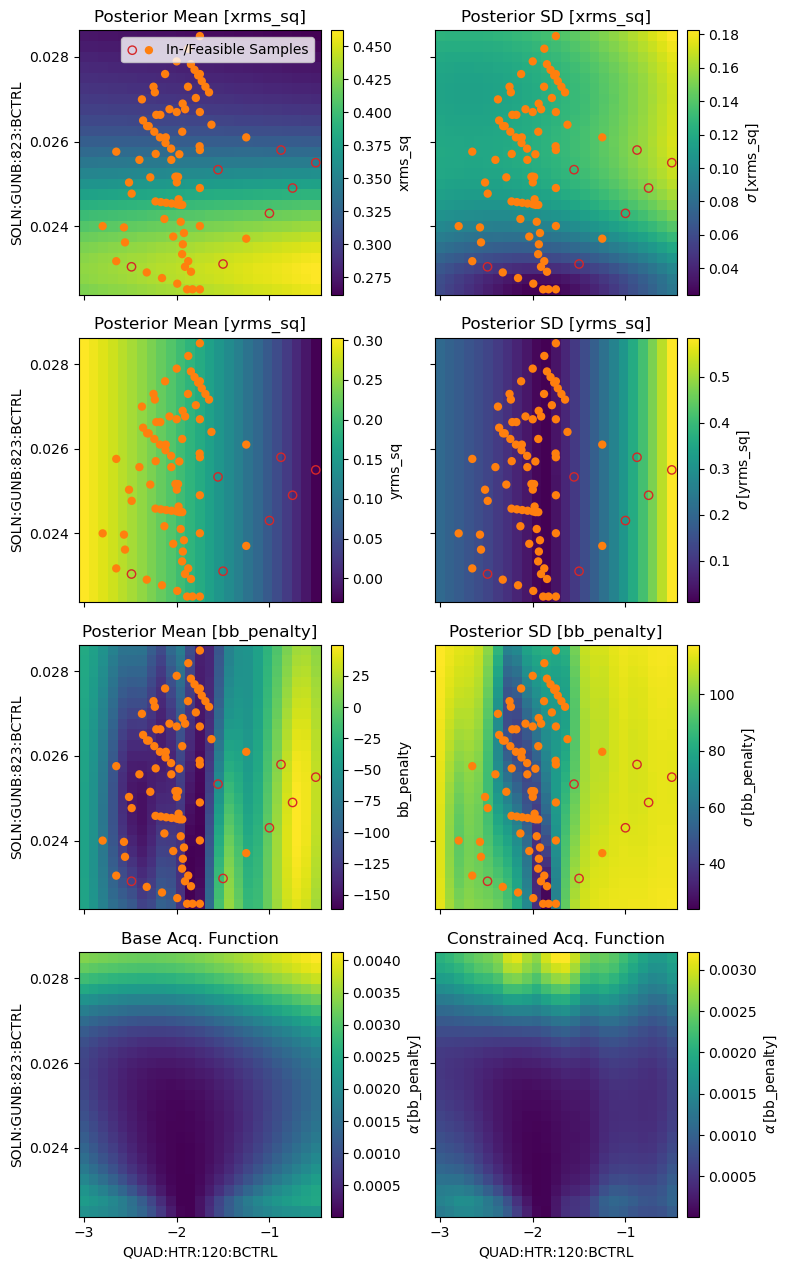

In [26]:
from xopt.generators.bayesian.visualize import visualize_generator_model
X_bax.generator.train_model()
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)


## view data and model

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0009, dtype=torch.float64), 'QUAD:GUNB:823:2:BCTRL': tensor(0.0012, dtype=torch.float64), 'SOLN:GUNB:823:BCTRL': tensor(0.0270, dtype=torch.float64)}


(<Figure size 900x900 with 12 Axes>,
 array([[<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Objective'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Emittance'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Bmag'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Sample Validity Rate'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>]], dtype=object))

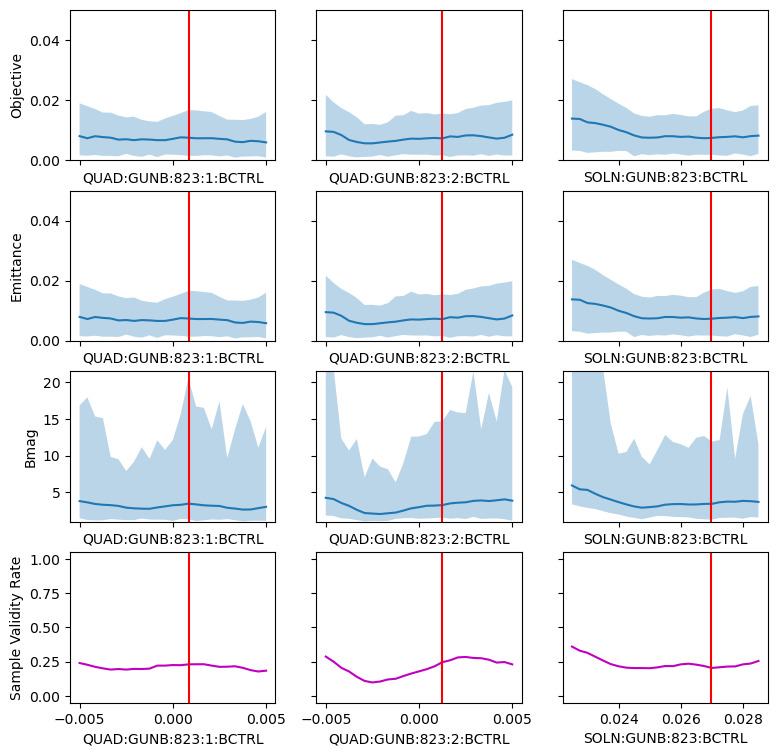

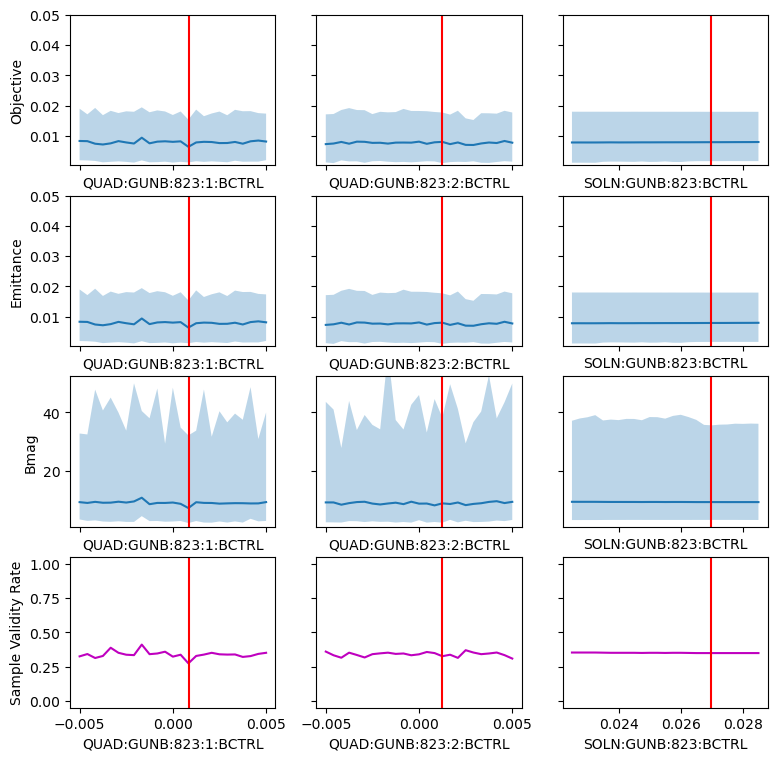

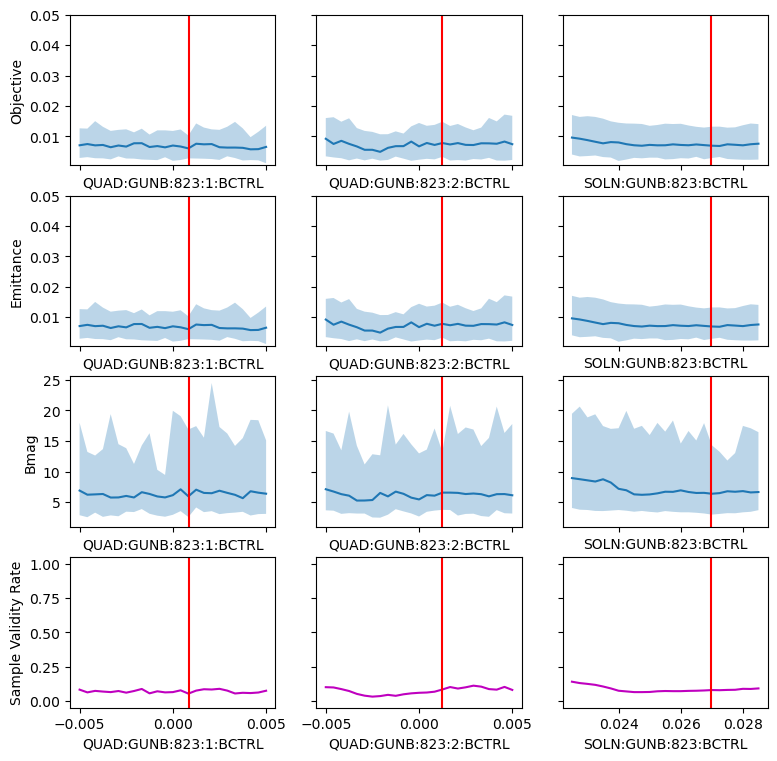

In [27]:
from plot_utils_fix import plot_virtual_emittance
from emitopt.utils import get_bax_optimum
best_x = get_bax_optimum(X_bax.generator)
print(best_x)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="x", y_max=0.05
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="y", y_max=0.05
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, y_max=0.05
)

Lowest bmag found at measurement quad value: tensor(-3.)


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'Mean-Square Beam Size GP Model Output'}, xlabel='Measurement Quad Setting (Machine Units)', ylabel='Mean-Square Beam Size (mm)'>,
        <Axes: ylabel='Bmag'>], dtype=object),
 tensor(-3.))

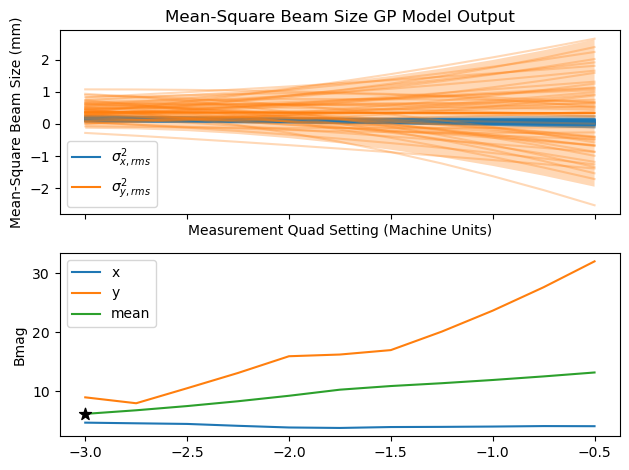

In [29]:
from plot_utils_fix import plot_virtual_measurement_scan
plot_virtual_measurement_scan(X_bax, best_x)

torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])


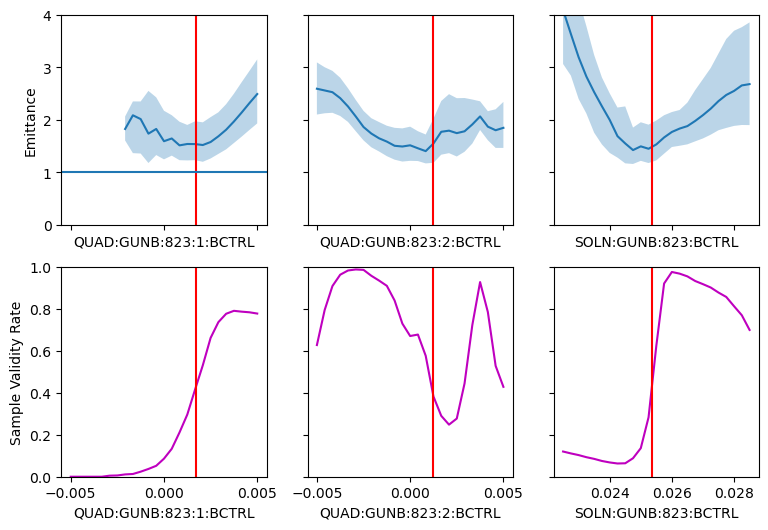

In [52]:
import copy
def plot_virtual_bmag(
    optimizer, reference_point, dim='xy', ci=0.95, tkwargs:dict=None, 
    n_points = 50, n_samples=1000, y_max=1., use_bmag=False
):
    """
    Plots the Bmag cross-sections corresponding to the GP posterior beam size model. 
    This function uses n_samples to produce a confidence interval.
    It DOES NOT use the pathwise sample functions, but rather draws new samples using BoTorch's 
    built-in posterior sampling.
    """
    tkwargs = tkwargs if tkwargs else {"dtype": torch.double, "device": "cpu"}
    x_origin = []
    for name in optimizer.generator.vocs.variable_names:
        if name in reference_point.keys():
            x_origin += [torch.tensor(reference_point[name]).reshape(1,1)]
    x_origin = torch.cat(x_origin, dim=1)    
    #extract GP models
    model = optimizer.generator.train_model()
    if len(optimizer.generator.algorithm.observable_names_ordered) == 2:
        if dim == 'x':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.y_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.x_key)]
        elif dim == 'y':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.x_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.y_key)]
        else:
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            bax_model_ids = [optimizer.generator.vocs.output_names.index(name)
                                    for name in optimizer.generator.algorithm.observable_names_ordered]
    bax_model = model.subset_output(bax_model_ids)
    meas_dim = algorithm.meas_dim
    
    bounds = optimizer.generator._get_optimization_bounds()
    tuning_domain = torch.cat((bounds.T[: meas_dim], bounds.T[meas_dim + 1:]))
    
    tuning_param_names = optimizer.vocs.variable_names
    del tuning_param_names[meas_dim]
        
    n_tuning_dims = x_origin.shape[1]
    
    fig, axs = plt.subplots(2, n_tuning_dims, sharex='col', sharey='row')
    fig.set_size_inches(3*n_tuning_dims, 6)
        
    for i in range(n_tuning_dims):
        # do a scan of the posterior emittance (via valid sampling)
        x_scan = torch.linspace(*tuning_domain[i], n_points, **tkwargs)
        x_tuning = x_origin.repeat(n_points, 1)
        x_tuning[:,i] = x_scan
        target, emit, bmag, is_valid, validity_rate, bss = algorithm.evaluate_target(bax_model, 
                                                                                   x_tuning, 
                                                                                   bounds,
                                                                                   tkwargs,
                                                                                   n_samples,
                                                                                   transform_target=False,
                                                                                   use_bmag=use_bmag)
        print(target.shape)
        print(bmag.shape)
        quants = torch.tensor([])
        
        for j in range(len(x_scan)):
            cut_ids = torch.tensor(range(len(bmag[:,j])), device=tkwargs['device'])[is_valid[:,j]]
            bmag_valid = torch.index_select(bmag[:,j], dim=0, index=cut_ids)
            q = torch.tensor([(1.-ci)/2., 0.5, (1.+ci)/2.], **tkwargs)
            if len(cut_ids)>=10:
                quant = torch.quantile(bmag_valid, q=q, dim=0).reshape(1,-1)
            else:
                quant = torch.tensor([[float('nan'), float('nan'), float('nan')]], **tkwargs)
            quants = torch.cat((quants, quant))

        if n_tuning_dims==1:
            ax = axs[0]
        else:
            ax = axs[0,i]
        ax.fill_between(x_scan, quants[:,0], quants[:,2], alpha=0.3)
        ax.plot(x_scan, quants[:,1])
        ax.axvline(x_origin[0,i], c='r')
        
        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Emittance')
            #ax.set_ylim(top=y_max)
        if n_tuning_dims==1:
            ax = axs[1]
        else:
            ax = axs[1,i]
        ax.plot(x_scan, validity_rate, c='m')
        ax.axvline(x_origin[0,i], c='r')
        ax.set_ylim(0,1)

        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Sample Validity Rate')
            
    return fig, axs

fig,ax = plot_virtual_bmag(
    X_bax, best_x, 
    n_points=25, dim="x",use_bmag=True,n_samples=1000,ci=0.5
)
ax[0,0].set_ylim(0,4)
ax[0,0].axhline(1.0)

In [ ]:
X_bax.vocs.normalize_inputs(X_bax.data).plot(y=X_bax.vocs.variable_names)

In [ ]:
from emitopt.plot_utils import plot_sample_optima_convergence_inputs
fig, axs = plot_sample_optima_convergence_inputs(results, show_valid_only=False)

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = best_x
)
ax[1].set_ylim(0,1.0)

In [ ]:
ax[1].set_ylim(0,0.15)
fig

In [30]:
best_x

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0025, dtype=torch.float64),
 'QUAD:GUNB:823:2:BCTRL': tensor(0.0037, dtype=torch.float64),
 'SOLN:GUNB:823:BCTRL': tensor(0.0258, dtype=torch.float64)}

In [55]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [31]:
best_x = {name: float(val) for name,val in best_x.items()} | {'QUAD:HTR:120:BCTRL':-2.0}

In [32]:
best_x

{'QUAD:GUNB:823:1:BCTRL': 0.002494999812915921,
 'QUAD:GUNB:823:2:BCTRL': 0.0036593331082258374,
 'SOLN:GUNB:823:BCTRL': 0.025765777006745337,
 'QUAD:HTR:120:BCTRL': -2.0}

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = {'SOLN:GUNB:823:BCTRL': 0.022}
)


In [33]:
X_bax.evaluate_data(best_x)

QUAD:GUNB:823:1:BCTRL 0.002494999812915921
QUAD:GUNB:823:2:BCTRL 0.0036593331082258374
SOLN:GUNB:823:BCTRL 0.025765777006745337
QUAD:HTR:120:BCTRL -2.0
fitting image


,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,QUAD:HTR:120:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.002495,0.003659,0.025766,-2.0,292.318458,283.748827,236.598028,207.295685,-234.074465,474530.4,...,0.0,0.0,0.87065,1.711350e+09,0.236598,0.207296,0.055979,0.042972,3.542563,False


In [ ]:
X_bax.evaluate_data({'SOLN:GUNB:823:BCTRL': 0.028, 'QUAD:HTR:120:BCTRL': -2.0})